In [1]:
import sys

sys.path.append('googlereviewscraper')
# Assuming you've defined DriverInit and 
# ReviewScraper in .py files in the same directory as your notebook



In [2]:
from googlereviewscraper.driver_init import DriverInit
from googlereviewscraper.review_scraper import ReviewScraper

In [ ]:
driver_init.close_browser()

In [3]:
url = 'https://www.google.com/search?rlz=1C1GCEA_enHR1085HR1085&q=Casablanca%20Reviews&rflfq=1&num=20&stick=H4sIAAAAAAAAAONgkxI2sTQzMjUzsDC2NDUzMTMzN7W03MDI-IpRyDmxODEpJzEvOVEhKLUsM7W8eBErFkEAULFNy0QAAAA&rldimm=4962560839564667599&tbm=lcl&hl=en&sa=X&ved=0CAYQ5foLahcKEwiAzYbJzIKEAxUAAAAAHQAAAAAQCg&biw=1536&bih=729&dpr=1.25#lkt=LocalPoiReviews&arid=ChZDSUhNMG9nS0VJQ0FnSURSNWJlRUhnEAE'

In [4]:
driver_init = DriverInit()
driver_init.navigate_to_url(url)

In [5]:
driver_init.navigate_to_reviews_tab()

In [6]:
%%sql


Exception: Data Source is not selected

In [6]:
review_scraper = ReviewScraper(driver_init)

In [7]:
review_scraper.load_reviews()

278 reviews found.


In [9]:
review_scraper.click_translate_buttons()

In [10]:
review_scraper.click_more_buttons()

In [12]:
review_scraper.collect_reviews()

No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.


In [14]:
review_scraper.save_reviews_to_csv(filename='reviews_and_ratings.csv')

Saved reviews to reviews_and_ratings.csv


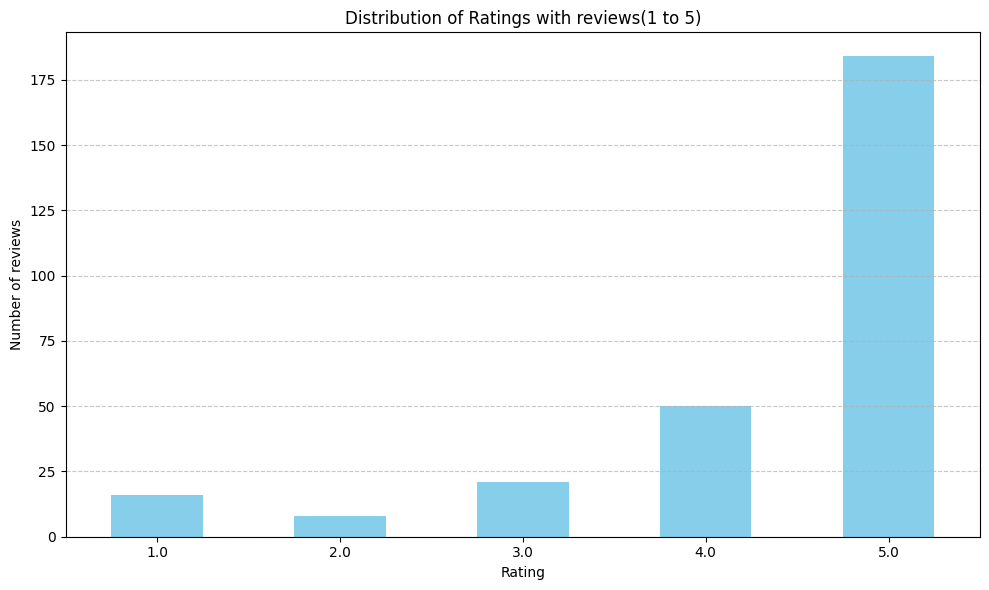

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reviews and ratings from the CSV file
df = pd.read_csv('reviews_and_ratings.csv')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings with reviews(1 to 5)')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels

# Display the plot
plt.show()

# Calculate the average and standard deviation of the ratings
average_rating = df['Rating'].mean()
std_rating = df['Rating'].std()

# Print the average and standard deviation
print(f"Average Rating: {average_rating:.2f}")
print(f"Standard Deviation of Rating: {std_rating:.2f}")

In [18]:
# Calculate the average and standard deviation of the ratings
average_rating = df['Rating'].mean()
std_rating = df['Rating'].std()

# Print the average and standard deviation
print(f"Average Rating: {average_rating:.2f}")
print(f"Standard Deviation of Rating: {std_rating:.2f}")

Average Rating: 4.35
Standard Deviation of Rating: 1.12


In [28]:
import pandas as pd
import re
import emoji


def clean_review(text):
    # Remove specific patterns like ratings
    pattern = r'Food: \d/\d\s+\|\s+Service: \d/\d\s+\|\s+Atmosphere: \d/\d'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()


def count_content_chars(text):
    # Convert emojis to a demojized form and count
    demojized_text = emoji.demojize(text)
    emoji_count = demojized_text.count(':') // 2  # Each emoji is represented by 2 colons
    # Count alphanumeric characters directly, excluding spaces for the count
    alnum_count = sum(c.isalnum() for c in text.replace(" ", ""))
    # Sum of alphanumeric and emoji counts
    return alnum_count + emoji_count


def clean_csv_file(input_file_path):
    # Load the CSV file
    df = pd.read_csv(input_file_path)

    # Drop rows where 'Review' column is NaN or empty
    df = df.dropna(subset=['Review'])
    df = df[df['Review'].str.strip().astype(bool)]

    # Clean the reviews by removing the ratings pattern and other undesired content
    df['Review'] = df['Review'].apply(clean_review)

    # Filter out reviews based on content character count, considering emojis
    df = df[df['Review'].apply(count_content_chars) > 20]

    # Further filter out rows where 'Review' becomes empty after cleaning
    df = df[df['Review'].str.strip().astype(bool)]

    # Define the output file path
    output_file_path = input_file_path.rsplit('.', 1)[0] + '_cleaned.csv'

    # Save the cleaned DataFrame to a new CSV file
    df.to_csv(output_file_path, index=False)
    return output_file_path


# Example usage
input_file_path = 'reviews_and_ratings.csv'  # Replace with your actual file path
cleaned_file_path = clean_csv_file(input_file_path)
print(f"Cleaned file saved to: {cleaned_file_path}")


Cleaned file saved to: reviews_and_ratings_cleaned.csv


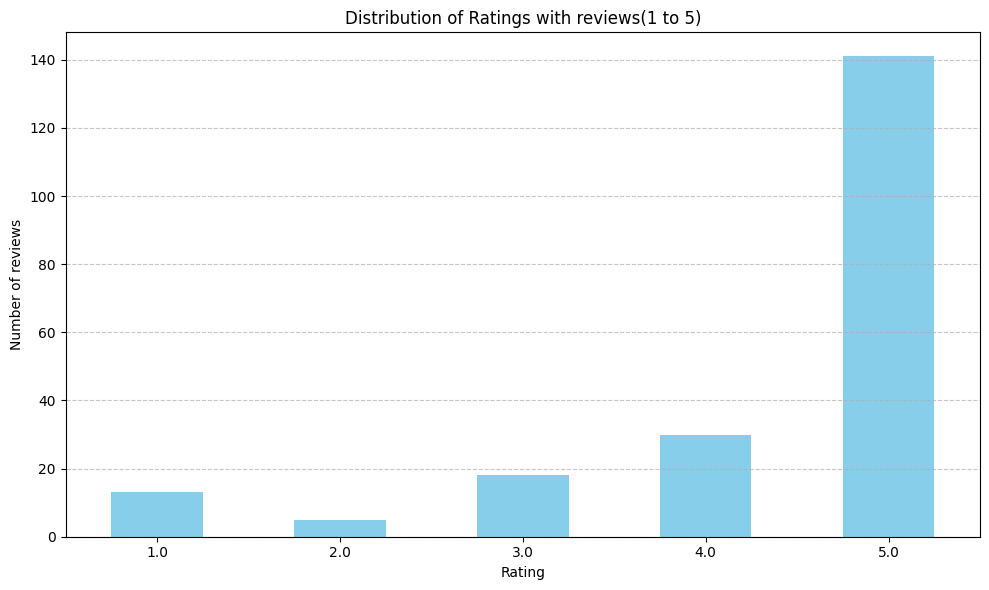

Average Rating: 4.36
Standard Deviation of Rating: 1.14


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reviews and ratings from the CSV file
df = pd.read_csv('reviews_and_ratings_cleaned.csv')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings with reviews(1 to 5)')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels

# Display the plot
plt.show()

# Calculate the average and standard deviation of the ratings
average_rating = df['Rating'].mean()
std_rating = df['Rating'].std()

# Print the average and standard deviation
print(f"Average Rating: {average_rating:.2f}")
print(f"Standard Deviation of Rating: {std_rating:.2f}")

Average character count per review: 120.25
Standard deviation of character count: 141.83


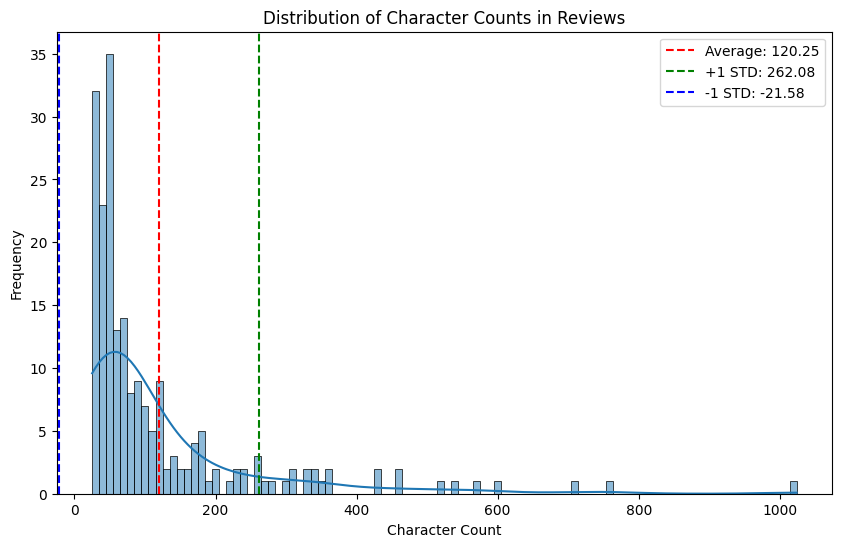

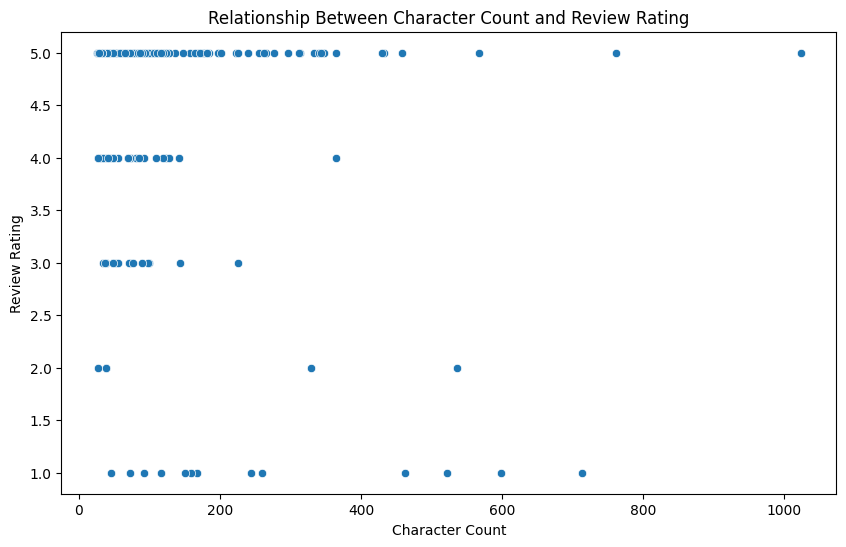

Correlation coefficient between character count and review rating:
            Char_Count    Rating
Char_Count    1.000000 -0.184562
Rating       -0.184562  1.000000


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data from the CSV file
df = pd.read_csv('reviews_and_ratings_cleaned.csv')  # Adjust the file path as needed

# Calculate the character count for each review
df['Char_Count'] = df['Review'].apply(len)

# Calculate the mean and standard deviation of the character counts
average_chars = df['Char_Count'].mean()
std_chars = df['Char_Count'].std()

print(f"Average character count per review: {average_chars:.2f}")
print(f"Standard deviation of character count: {std_chars:.2f}")

# Plotting the distribution of character counts
plt.figure(figsize=(10, 6))
sns.histplot(df['Char_Count'], bins=100, kde=True)
plt.title('Distribution of Character Counts in Reviews')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.axvline(average_chars, color='r', linestyle='--', label=f'Average: {average_chars:.2f}')
plt.axvline(average_chars + std_chars, color='g', linestyle='--', label=f'+1 STD: {average_chars + std_chars:.2f}')
plt.axvline(average_chars - std_chars, color='b', linestyle='--', label=f'-1 STD: {average_chars - std_chars:.2f}')
plt.legend()
plt.show()

# Assuming there is a 'Rating' column in your CSV for review ratings
# Analyze the relationship between character count and review rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Char_Count', y='Rating', data=df)
plt.title('Relationship Between Character Count and Review Rating')
plt.xlabel('Character Count')
plt.ylabel('Review Rating')
plt.show()

# Optional: Calculate the correlation coefficient
correlation = df[['Char_Count', 'Rating']].corr()
print(f"Correlation coefficient between character count and review rating:\n{correlation}")


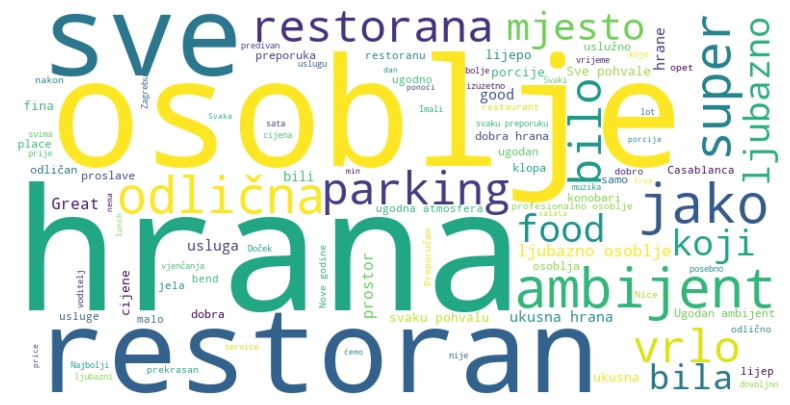

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('reviews_and_ratings_cleaned.csv')  # Adjust the filename as needed

# Combine all reviews into a single string
text = " ".join(review for review in df.Review)

# List of stopwords to exclude
# Define additional stopwords specific to your context
additional_stopwords = {'za', 'je', 'na', 'u', 'i', 'da', 'su', 'smo', 'od', 'se', 'sa', 'mi', 'ali', 'sam', 'ne', 'bi',
                        'po', 'bio', 'koja', 'koju', 'jer', 'ni', 'ok', 'tako', 'uz', 'što', 'još', 'ili', 's', 'ima',
                        'nas', 'pa', 'bez', 'kako', 'kao', 'osim'}  # Add more words as needed

# Combine the default STOPWORDS with your additional stopwords
stopwords = set(STOPWORDS).union(additional_stopwords)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100,
                      width=800, height=400, contour_width=3, contour_color='steelblue').generate(text)

# Display the generated image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
